# Naive Bayes
베이즈 정리를 이용한 '분류(Classification)' 모형   
1. 다항 분류도 가능 
2. feature가 이산 확률 변수일때 성능이 제일 좋다 (연속 데이터도 처리 가능)
3. 계산 시간이 매우 빨라 큰 데이터 셋에 적합하다
4. 관련 없는 feature에 대해 민감하지 않다
5. feature 간의 독립성이 전제되어야 한다 --> 다만 실제 데이터에서는 모든 feature가 독립인 경우는 드물다(단점)
   
베이즈 정리: 사전 확률과 조건부확률을 통하여 사후확률을 구하는 정리
나이브 베이즈가 사용되는 분야: 얼굴 인식, 날씨 예측, 의료 진단, 뉴스 분류, 자연어 처리 등

## Scikit-learn을 이용한 나이브 베이즈 분류기 구축

In [19]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# 데이터셋 로드
iris=load_iris()
df=pd.DataFrame(data=np.c_[iris.data, iris.target], columns=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
# BernoulliNB : class가 2개일 때
# MultinomialNB : class가 3개 이상일 때
# GaussianNB : 가우시안 나이브 베이즈 모델

# train, test 분리
X=df[df.columns[:-1]] # 마지막 column은 미포함
y=df.target
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state = 42)

# Naive Bayes 모델 생성
model=MultinomialNB()   # 3개의 다중 분류를 고려하여 모델 생성
model.fit(X_train, y_train)

MultinomialNB()

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred=model.predict(X_test)
print('Accuracy : ', accuracy_score(y_test, y_pred)) # 분류 모델은 주로 accuracy를 확인한다
confusion = confusion_matrix(y_test, y_pred)

Accuracy :  0.9555555555555556


<Axes: >

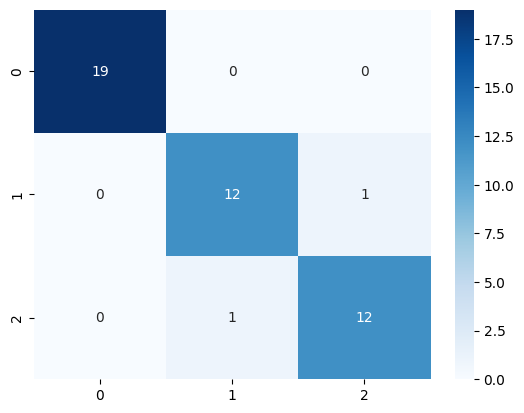

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')

<Axes: >

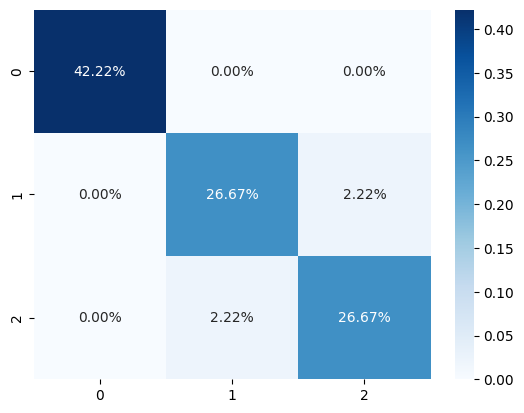

In [23]:
sns.heatmap(confusion /np.sum(confusion), annot=True, fmt='.2%', cmap='Blues')

# SVM(Support Vector Machine)
1. 예측 확률을 구할 수 없다
2. 결정 경계는 feature의 개수에 따라서 차원이 달라진다(n+1개의 feature --> n차의 결정 경계 = 초평면)

### Support Vector
1. 결정 경계 위의 관찰 값들을 의미
2. 결정 경계를 결정하는 표본
3. 서포트 벡터를 움직이면 길의 폭이 달라진다
4. 서포트 벡터 이외의 관찰 값들은 길을 결정하는데 아무런 영향을 미치지 못한다

### 결정 경계(Decision Boundary)
1. 서포트 벡터를 지나는 초평면의 거리를 극대화하는 w를 계수로 하는 초평면을 결정 경계로 사용한다
2. wx - b가 1보다 크면 1로 결정, -1보다 작으면 -1로 결정하는 경계선이 된다.
3. ( 2 / ||w|| )가 서포트 벡터를 지나는 초평면의 거리이다.
4. 이를 반으로 나눈 ( 1 / ||w|| )를 margin이라 하며 이를 극대화하는 것이 서포트벡터 머신의 목표이다
5. margin이 커질수록 분류된 클래스들 사이의 거리가 멀어져서 명료한 분류가 되는 것을 의미한다

### 마진(Margin)
1. 서포트 벡터로부터 결정 경계 사이의 거리
2. 최적의 결정 경계는 마진을 최대화 한다
3. n개의 속성을 가진 데이터에는 최소 n+1개의 서포트 벡터가 필요하다

### Parameter C
1. Hard Margin: C값이 커질수록 서포트 벡터와 결정 경계의 사이가 좁아지고 outlier들을 허용하지 않아 오버피팅의 문제가 있다
2. Soft Margin: C값이 작아질수록 서포트 벡터와 결정 경계의 사이가 멀어지고 outlier들을 허용하지만 언더피팅의 문제가 발생할 수 있다
3. 즉 파라미터 C값과 마진은 반비례의 관계이다(C가 커지면 마진이 작아지고 C가 작아지면 마진이 커진다)

## SVM을 이용한 Regression

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.data import gapminder

In [25]:
data=gapminder() # 데이터 로드
data

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [26]:
df_asia = px.data.gapminder().query("continent=='Asia'")          # 아시아 국가만
df_oce = px.data.gapminder().query("continent=='Oceania'")        # 오세아니아 국가만
fig = px.line(df_oce, x="year", y="lifeExp", color='country')
fig.show()

In [27]:
# split X and Y
X=data[['country','continent','year','pop','gdpPercap']]
y=data.lifeExp

In [28]:
# X의 categorical data에 대하여 더미변수 생성
X=pd.get_dummies(data=X, columns=['country','continent'], drop_first=True, dtype=int)
X

,year,pop,gdpPercap,country_Albania,country_Algeria,country_Angola,country_Argentina,country_Australia,country_Austria,country_Bahrain,...,country_Venezuela,country_Vietnam,country_West Bank and Gaza,"country_Yemen, Rep.",country_Zambia,country_Zimbabwe,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
0,1952,8425333,779.445314,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1957,9240934,820.853030,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1962,10267083,853.100710,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1967,11537966,836.197138,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1972,13079460,739.981106,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,1987,9216418,706.157306,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1700,1992,10704340,693.420786,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1701,1997,11404948,792.449960,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1702,2002,11926563,672.038623,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [29]:
# Train / Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [30]:
# 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
from sklearn.svm import SVR

model = SVR(kernel='rbf', C=8, gamma=0.1) # 파라미터 C로 8, 감마값은 0.1을 주었다
model.fit(X_train, y_train)

# train 데이터에서의 성능
train_score = model.score(X_train, y_train)

# test 데이터에서의 성능
test_score = model.score(X_test, y_test)

# y_train으로 예측한 데이터
y_pred = model.predict(X_test)

In [32]:
# 비교
pd.DataFrame([y_pred, y_test]).T.rename({0:'pred', 1:'actual'}, axis=1).tail(10)

,pred,actual
331,57.133611,52.970
332,41.737153,34.906
333,50.715885,44.600
334,44.456357,46.242
335,53.883477,56.155
336,61.104941,61.368
337,70.229560,70.750
338,67.782506,69.150
339,75.386484,75.380
340,52.417354,47.991


In [33]:
# RMSE 구하기
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

3.7138417207305787


In [34]:
# plotly를 이용한 시각화
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_pred, y=y_test, mode='markers'))
fig.add_trace(go.Scatter(x=np.arange(min(y_test),max(y_test)), y=np.arange(min(y_test),max(y_test))))
fig.update_layout(width=1200, height=800)
fig.show()

## SVM을 이용한 Classification

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from plotly.data import iris

In [36]:
data=iris()

In [37]:
data

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


In [38]:
fig = px.scatter_3d(data,
                    x='sepal_length',
                    y='sepal_width',
                    z='petal_width',
                    color='petal_length',
                    symbol='species',
                    opacity=0.7)
fig.show()

In [39]:
fig = px.scatter_matrix(data,
                        dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"],
                        color='species')
fig.update_layout(width=1200, height=800)
fig.show()

In [40]:
X=data[['sepal_width', 'sepal_length', 'petal_width','petal_length']]
y=data.species

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [42]:
# 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=8, gamma=0.1)
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

y_pred = model.predict(X_test)

In [44]:
pd.DataFrame([y_pred, y_test]).T.rename({0:'pred', 1:'actual'}, axis=1).tail(10)

,pred,actual
20,versicolor,versicolor
21,setosa,setosa
22,versicolor,versicolor
23,setosa,setosa
24,virginica,virginica
25,virginica,virginica
26,versicolor,versicolor
27,setosa,setosa
28,virginica,virginica
29,virginica,virginica


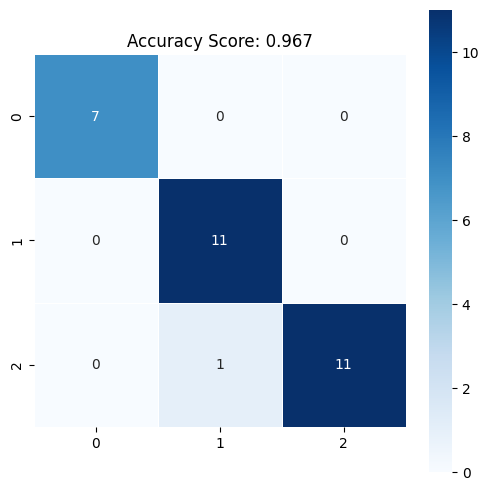

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues')
all_sample_title = 'Accuracy Score: {:.3f}'.format(test_score)
plt.title(all_sample_title, size = 12)
plt.show()